<a href="https://colab.research.google.com/github/mafazann/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama  : M. Rizky Mafazan
### Kelas : 3F - TI
### NIM   : 2141720140

## TUGAS PRAKTIKUM

 1. Import folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pytesseract

2. Import beberapa library

In [20]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

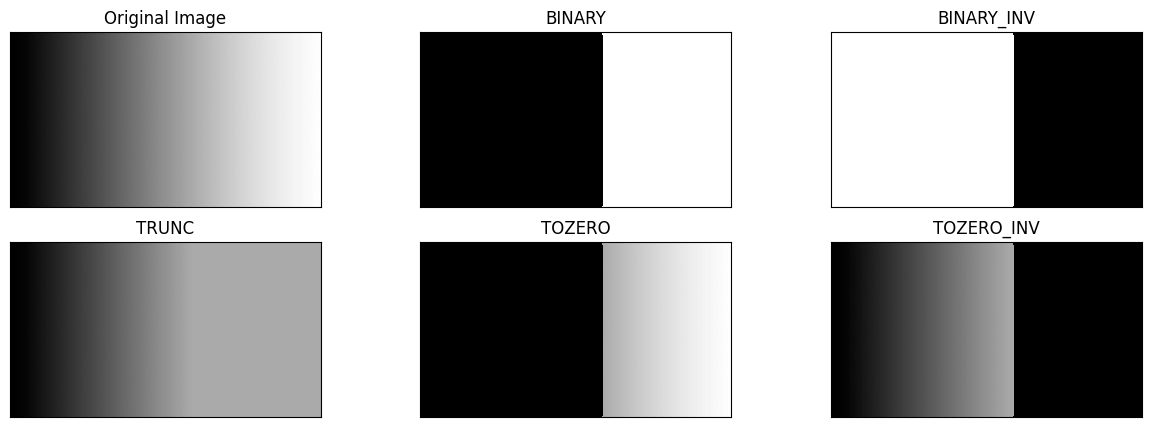

In [23]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
img = cv.imread(filename)

thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

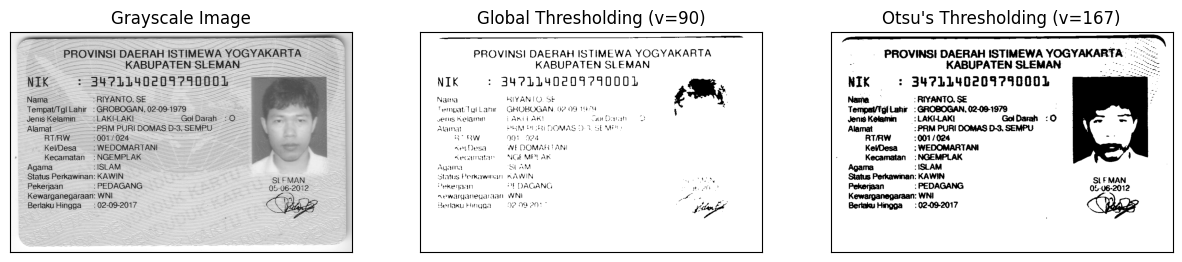

In [26]:
# Load the image using cv2 in grayscale
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg', cv.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to the image
blur = cv.GaussianBlur(img,(5,5),0)

# Set the global threshold value
thresh_global = 90

# Apply global thresholding
global_thresh = blur.copy()
global_thresh[blur > thresh_global] = 255
global_thresh[blur <= thresh_global] = 0

# Set the specific threshold value for Otsu's thresholding
thresh_otsu = 167

# Apply Otsu's thresholding
otsu_thresh = blur.copy()
otsu_thresh[blur > thresh_otsu] = 255
otsu_thresh[blur <= thresh_otsu] = 0

# Display the images
titles = ['Grayscale Image', 'Global Thresholding (v=90)', f"Otsu's Thresholding (v={thresh_otsu})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

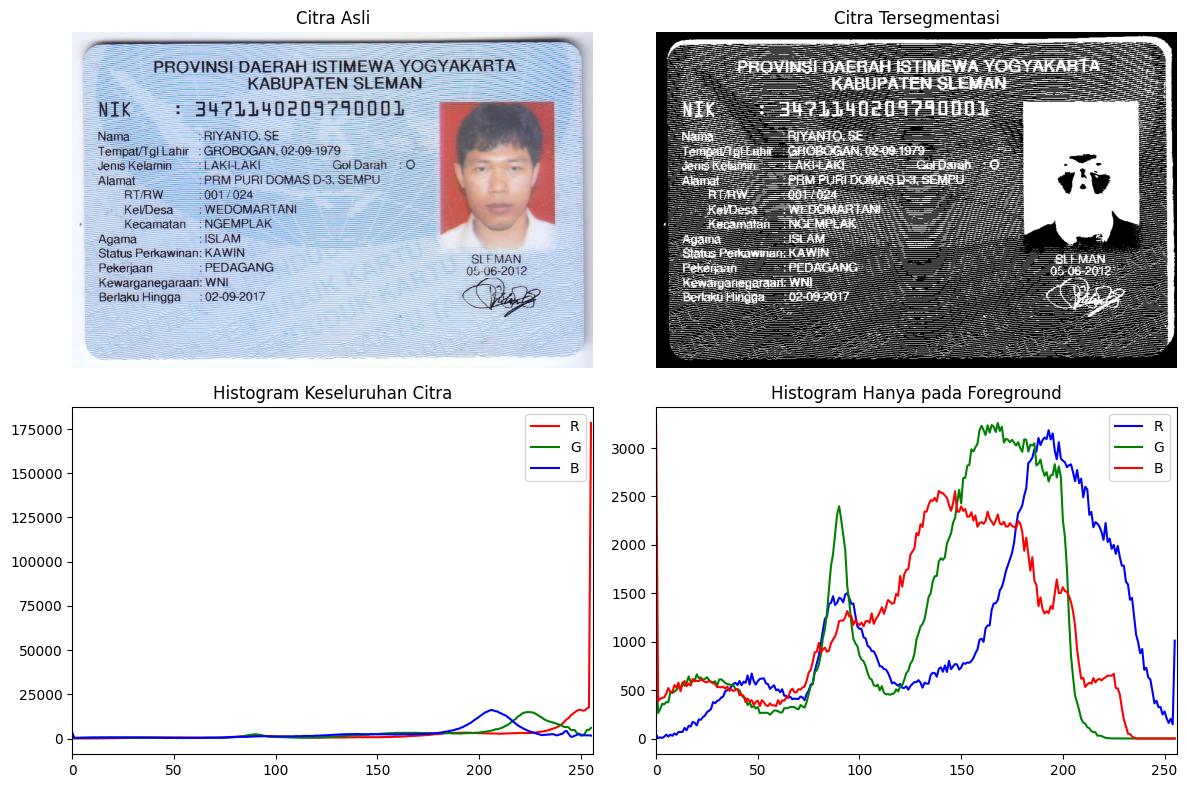

In [27]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg', cv.IMREAD_COLOR)

# Ubah ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan threshold untuk mendapatkan citra tersegmentasi
_, thresholded = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)

# Buat mask untuk citra tersegmentasi
mask = np.zeros(gray_img.shape, dtype=np.uint8)
mask[thresholded == 255] = 255

# Hitung histogram citra asli untuk setiap saluran warna
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

# Hitung histogram citra tersegmentasi untuk setiap saluran warna
hist_segmented_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_segmented_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_segmented_b = cv.calcHist([img], [2], mask, [256], [0, 256])

# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Tersegmentasi')
plt.axis('off')

# Tampilkan histogram keseluruhan citra untuk setiap saluran warna
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='red')
plt.plot(hist_full_g, color='green')
plt.plot(hist_full_b, color='blue')
plt.title('Histogram Keseluruhan Citra')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Tampilkan histogram hanya pada foreground untuk setiap saluran warna
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_r, color='blue')
plt.plot(hist_segmented_g, color='green')
plt.plot(hist_segmented_b, color='red')
plt.title('Histogram Hanya pada Foreground')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Atur tata letak plot
plt.tight_layout()

# Tampilkan plot
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

In [ ]:
Filename = ('/content/drive/MyDrive/PCVK_MM/Images/KTP_Riyanto.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah
array 3D
selanjutnya kita perlu melakukan flattening array image
masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid
sudah tidak terlalu banyak pergeseran posisi antara
interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data
yang besar, maka kita akan hentikan iterasi saat jumlah
iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn
posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS +
cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None,
criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
 plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)